Importation des modules :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pyproj
import fiona
import geopandas


PROJ: proj_create_from_database: Cannot find proj.db


Importation des données :

In [3]:
lic_comm = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/9b002e32-0ec9-40fc-9292-cddeae4416c6", encoding="utf-8", sep=";")
lic_comm.head()

C:\Users\Cosima\AppData\Local\Temp\ipykernel_20388\1057133999.py:1: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  lic_comm = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/9b002e32-0ec9-40fc-9292-cddeae4416c6", encoding="utf-8", sep=";")


,Code Commune,Commune,Code QPV,Nom QPV,Département,Région,Statut géo,Code,Fédération,F - 1 à 4 ans,...,H - NR,NR - 5 à 9 ans,NR - 10 à 14 ans,NR - 15 à 19 ans,NR - 30 à 34 ans,NR - 40 à 44 ans,NR - 45 à 49 ans,NR - 70 à 74 ans,NR - NR,Total
0,1001,L'Abergement-Clémenciat,CSZ,NaN,1,Auvergne-Rhône-Alpes,1.Champ geoc,101,FF d'Athlétisme,0,...,0,0,0,0,0,0,0,0,0,8
1,1001,L'Abergement-Clémenciat,CSZ,NaN,1,Auvergne-Rhône-Alpes,1.Champ geoc,103,FF de Badminton,0,...,0,0,0,0,0,0,0,0,0,11
2,1001,L'Abergement-Clémenciat,CSZ,NaN,1,Auvergne-Rhône-Alpes,1.Champ geoc,105,FF de Basketball,0,...,0,0,0,0,0,0,0,0,0,1
3,1001,L'Abergement-Clémenciat,CSZ,NaN,1,Auvergne-Rhône-Alpes,1.Champ geoc,108,FF de Cyclisme,0,...,0,0,0,0,0,0,0,0,0,2
4,1001,L'Abergement-Clémenciat,CSZ,NaN,1,Auvergne-Rhône-Alpes,1.Champ geoc,109,FF d'Équitation,0,...,0,0,0,0,0,0,0,0,0,10


Nom des colonnes de la base :

In [3]:
lic_comm.columns

Index(['code_commune', 'libelle', 'region', 'fed_2019', 'nom_fed', 'l_2019',
       'l_0_4_2019', 'l_5_9_2019', 'l_10_14_2019', 'l_15_19_2019',
       'l_20_29_2019', 'l_30_44_2019', 'l_45_59_2019', 'l_60_74_2019',
       'l_75_2019', 'l_f_2019', 'l_0_4_f_2019', 'l_5_9_f_2019',
       'l_10_14_f_2019', 'l_15_19_f_2019', 'l_20_29_f_2019', 'l_30_44_f_2019',
       'l_45_59_f_2019', 'l_60_74_f_2019', 'l_75_f_2019', 'l_h_2019',
       'l_0_4_h_2019', 'l_5_9_h_2019', 'l_10_14_h_2019', 'l_15_19_h_2019',
       'l_20_29_h_2019', 'l_30_44_h_2019', 'l_45_59_h_2019', 'l_60_74_h_2019',
       'l_75_h_2019', 'l_qp_2019', 'l_qp_f_2019', 'l_qp_h_2019', 'pop_2018',
       'pop_0_4_2018', 'pop_5_9_2018', 'pop_10_14_2018', 'pop_15_19_2018',
       'pop_20_29_2018', 'pop_30_44_2018', 'pop_45_59_2018', 'pop_60_74_2018',
       'pop_75_2018', 'popf_2018', 'popf_0_4_2018', 'popf_5_9_2018',
       'popf_10_14_2018', 'popf_15_19_2018', 'popf_20_29_2018',
       'popf_30_44_2018', 'popf_45_59_2018', 'popf_60_

Selection des variables d'intérêt : on garde quasiment toutes les variables, hormis celles trop détaillées sur la population de chaque commune selon l'âge.

In [4]:
lic_comm = lic_comm[['code_commune', 'libelle', 'region', 'fed_2019', 'nom_fed', 'l_2019',
       'l_0_4_2019', 'l_5_9_2019', 'l_10_14_2019', 'l_15_19_2019',
       'l_20_29_2019', 'l_30_44_2019', 'l_45_59_2019', 'l_60_74_2019',
       'l_75_2019', 'l_f_2019', 'l_0_4_f_2019', 'l_5_9_f_2019',
       'l_10_14_f_2019', 'l_15_19_f_2019', 'l_20_29_f_2019', 'l_30_44_f_2019',
       'l_45_59_f_2019', 'l_60_74_f_2019', 'l_75_f_2019', 'l_h_2019',
       'l_0_4_h_2019', 'l_5_9_h_2019', 'l_10_14_h_2019', 'l_15_19_h_2019',
       'l_20_29_h_2019', 'l_30_44_h_2019', 'l_45_59_h_2019', 'l_60_74_h_2019',
       'l_75_h_2019', 'l_qp_2019', 'l_qp_f_2019', 'l_qp_h_2019', 'pop_2018', 'popf_2018', 'poph_2018']]

Types de chaque variable :

In [5]:
lic_comm.dtypes

code_commune       object
libelle            object
region             object
fed_2019            int64
nom_fed            object
l_2019              int64
l_0_4_2019          int64
l_5_9_2019          int64
l_10_14_2019        int64
l_15_19_2019        int64
l_20_29_2019        int64
l_30_44_2019        int64
l_45_59_2019        int64
l_60_74_2019        int64
l_75_2019           int64
l_f_2019            int64
l_0_4_f_2019        int64
l_5_9_f_2019        int64
l_10_14_f_2019      int64
l_15_19_f_2019      int64
l_20_29_f_2019      int64
l_30_44_f_2019      int64
l_45_59_f_2019      int64
l_60_74_f_2019      int64
l_75_f_2019         int64
l_h_2019            int64
l_0_4_h_2019        int64
l_5_9_h_2019        int64
l_10_14_h_2019      int64
l_15_19_h_2019      int64
l_20_29_h_2019      int64
l_30_44_h_2019      int64
l_45_59_h_2019      int64
l_60_74_h_2019      int64
l_75_h_2019         int64
l_qp_2019         float64
l_qp_f_2019       float64
l_qp_h_2019       float64
pop_2018    

In [6]:
lic_comm = lic_comm.convert_dtypes()
lic_comm.dtypes

code_commune              object
libelle           string[python]
region            string[python]
fed_2019                   Int64
nom_fed           string[python]
l_2019                     Int64
l_0_4_2019                 Int64
l_5_9_2019                 Int64
l_10_14_2019               Int64
l_15_19_2019               Int64
l_20_29_2019               Int64
l_30_44_2019               Int64
l_45_59_2019               Int64
l_60_74_2019               Int64
l_75_2019                  Int64
l_f_2019                   Int64
l_0_4_f_2019               Int64
l_5_9_f_2019               Int64
l_10_14_f_2019             Int64
l_15_19_f_2019             Int64
l_20_29_f_2019             Int64
l_30_44_f_2019             Int64
l_45_59_f_2019             Int64
l_60_74_f_2019             Int64
l_75_f_2019                Int64
l_h_2019                   Int64
l_0_4_h_2019               Int64
l_5_9_h_2019               Int64
l_10_14_h_2019             Int64
l_15_19_h_2019             Int64
l_20_29_h_

In [7]:
lic_comm.head()

,code_commune,libelle,region,fed_2019,nom_fed,l_2019,l_0_4_2019,l_5_9_2019,l_10_14_2019,l_15_19_2019,...,l_30_44_h_2019,l_45_59_h_2019,l_60_74_h_2019,l_75_h_2019,l_qp_2019,l_qp_f_2019,l_qp_h_2019,pop_2018,popf_2018,poph_2018
0,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,101,FF d'athlétisme,8,0,0,4,2,...,0,0,0,0,0,0,0,770,382,388
1,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,103,FF de badminton,11,0,0,4,1,...,2,2,0,0,0,0,0,770,382,388
2,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,105,FF de basketball,1,0,0,0,0,...,0,0,0,0,0,0,0,770,382,388
3,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,108,FF de cyclisme,2,0,1,1,0,...,0,0,0,0,0,0,0,770,382,388
4,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,109,FF d'équitation,10,0,0,2,2,...,0,0,2,0,0,0,0,770,382,388


Il faut modifier les types des variables qui sont de type "object", et les transformer en character ou integer selon les variables. Seule les variables 'code_commune' et 'fed_2019' ne sont pas du bon type et doivent être transformées en character.

Champ :
Nombre de communes contenues dans la base, nombre de régions :

In [8]:
lic_comm['code_commune'].nunique() #34893 communes

34893

In [9]:

lic_comm['region'].unique() #18 regions


<StringArray>
[      'Auvergne-Rhône-Alpes',            'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",                  'Grand Est',
                  'Occitanie',                  'Normandie',
         'Nouvelle-Aquitaine',        'Centre-Val de Loire',
    'Bourgogne-Franche-Comté',                   'Bretagne',
                      'Corse',           'Pays de la Loire',
              'Île-de-France',                 'Guadeloupe',
                 'Martinique',                     'Guyane',
                 'La Réunion',                    'Mayotte']
Length: 18, dtype: string

Nombre de fédérations sportives et leur libellé :

In [10]:
lic_comm['fed_2019'].nunique() #99 identifiants de federation


99

In [11]:
lic_comm['nom_fed'].unique()

<StringArray>
[                                                                            "FF d'athlétisme",
                                                                             'FF de badminton',
                                                                            'FF de basketball',
                                                                              'FF de cyclisme',
                                                                             "FF d'équitation",
                                                                                "FF d'escrime",
                                                                              'FF de football',
                                                                           'FF de gymnastique',
                                                                              'FF de handball',
                                                 'FF de judo-jujitsu et disciplines associées',
                          

Nombre de licenciés dans chaque région :

In [12]:
lic_comm[['region', 'l_2019']].groupby('region').sum().sort_values(by = 'l_2019', ascending = False)

,l_2019
region,
Île-de-France,2361371
Auvergne-Rhône-Alpes,1991253
Nouvelle-Aquitaine,1464038
Occitanie,1399815
Grand Est,1232376
Hauts-de-France,1165458
Provence-Alpes-Côte d'Azur,1115545
Pays de la Loire,901611
Bretagne,847053


Statistiques par régions :
Nombre de licencies dans chaque sport par région, classés dans l'ordre décroissant

In [13]:
lic_comm[['region', 'nom_fed', 'l_2019']].groupby(['region', 'nom_fed']).sum().sort_values(by = 'l_2019', ascending = False).head(20)

,,l_2019
region,nom_fed,
Île-de-France,FF de football,281714
Auvergne-Rhône-Alpes,FF de football,265581
Hauts-de-France,FF de football,233564
Île-de-France,FF de tennis,225046
Grand Est,FF de football,215463
Nouvelle-Aquitaine,FF de football,196367
Île-de-France,Union nationale du sport scolaire (UNSS),185486
Occitanie,FF de football,172856
Pays de la Loire,FF de football,171808


Sports les plus pratiqués par les femmes sur l'ensemble des communes :

In [14]:
f = lic_comm[['nom_fed', 'l_f_2019']].groupby(['nom_fed']).sum().sort_values(by = 'l_f_2019', ascending = False)
f.head(10)

,l_f_2019
nom_fed,
FF d'équitation,508122
Union nationale du sport scolaire (UNSS),489552
FF d'éducation physique et de gymnastique volo...,440480
Union sportive de l'enseignement du premier degré,359430
FF de tennis,284591
FF de gymnastique,265492
FF de natation,196285
FF de football,182537
FF de basketball,180125


Sports les plus pratiqués par les hommes sur l'ensemble des communes :

In [15]:
h = lic_comm[['nom_fed', 'l_h_2019']].groupby(['nom_fed']).sum().sort_values(by = 'l_h_2019', ascending = False)
h.head(10)

,l_h_2019
nom_fed,
FF de football,2006078
FF de tennis,686451
Union nationale du sport scolaire (UNSS),683497
FF de judo-jujitsu et disciplines associées,366378
Union sportive de l'enseignement du premier degré,356872
FF de basketball,333342
FF de handball,309847
FF de golf,301549
FF de rugby,288664



Pour simplifier l'analyse et la représentation graphique, il faut réduire le nombre de colonnes et ajouter de nouvelles lignes correspondant au nombre de licenciés de chaque fédération par commune selon la catégorie (ajouter une colonne sexe, tranche d'age...). On utilise la fonction melt pour ajouter les variables 'Sexe', 'tranche_age' et 'Nb_licencies' qui correspond au nombre de licenciés d'une fédération donnée par commune, sexe et tranche d'âge, à partir des colonnes 'nom_fed', 'code_commune', 'libelle','region', et de toutes les colonnes correspondant à une catégorie sexe-âge. 

In [16]:
lic_comm.columns

Index(['code_commune', 'libelle', 'region', 'fed_2019', 'nom_fed', 'l_2019',
       'l_0_4_2019', 'l_5_9_2019', 'l_10_14_2019', 'l_15_19_2019',
       'l_20_29_2019', 'l_30_44_2019', 'l_45_59_2019', 'l_60_74_2019',
       'l_75_2019', 'l_f_2019', 'l_0_4_f_2019', 'l_5_9_f_2019',
       'l_10_14_f_2019', 'l_15_19_f_2019', 'l_20_29_f_2019', 'l_30_44_f_2019',
       'l_45_59_f_2019', 'l_60_74_f_2019', 'l_75_f_2019', 'l_h_2019',
       'l_0_4_h_2019', 'l_5_9_h_2019', 'l_10_14_h_2019', 'l_15_19_h_2019',
       'l_20_29_h_2019', 'l_30_44_h_2019', 'l_45_59_h_2019', 'l_60_74_h_2019',
       'l_75_h_2019', 'l_qp_2019', 'l_qp_f_2019', 'l_qp_h_2019', 'pop_2018',
       'popf_2018', 'poph_2018'],
      dtype='object')

In [18]:
lic_comm = lic_comm.melt(id_vars=['nom_fed', 'code_commune', 'libelle', 'region', 'pop_2018', 'popf_2018', 'poph_2018'], value_vars=['l_f_2019', 'l_h_2019', 'l_0_4_2019', 'l_5_9_2019', 'l_10_14_2019', 'l_15_19_2019',
       'l_20_29_2019', 'l_30_44_2019', 'l_45_59_2019', 'l_60_74_2019',
       'l_75_2019', 'l_0_4_f_2019', 'l_5_9_f_2019',
       'l_10_14_f_2019', 'l_15_19_f_2019', 'l_20_29_f_2019', 'l_30_44_f_2019',
       'l_45_59_f_2019', 'l_60_74_f_2019', 'l_75_f_2019',
       'l_0_4_h_2019', 'l_5_9_h_2019', 'l_10_14_h_2019', 'l_15_19_h_2019',
       'l_20_29_h_2019', 'l_30_44_h_2019', 'l_45_59_h_2019', 'l_60_74_h_2019',
       'l_75_h_2019', 'l_qp_2019', 'l_qp_f_2019', 'l_qp_h_2019'], var_name = 'categorie', value_name = 'nb_licencies')

In [19]:
lic_comm.head()

,nom_fed,code_commune,libelle,region,pop_2018,popf_2018,poph_2018,categorie,nb_licencies
0,FF d'athlétisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,3
1,FF de badminton,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,3
2,FF de basketball,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,0
3,FF de cyclisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,0
4,FF d'équitation,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,8


Créer une nouvelle variable sexe, une tranche d'âge et une qpv :

In [20]:
lic_comm['tranche_age'] = 'Ensemble' #Valeur par defaut, pour qu'elle soit bien condiérée comme une variale de type caractère
lic_comm['sexe'] = "Ensemble" #Pareil
lic_comm['qpv'] = 'False' #Qpv : nb de licencies vivant dans un qartier prioritaire des politiques de la ville


#Ajout variable 'tranche_age' : au total 9 catégories d'âge
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("0_4"), "0-4", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("5_9"), "5-9", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("10_14"), "10-14", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("15_19"), "15-19", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("20_29"), "20-29", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("30_44"), "30-44", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("45_59"), "45-59", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("60_74"), "60-74", lic_comm['tranche_age'])
lic_comm['tranche_age'] = np.where(lic_comm['categorie'].str.contains("75"), "75", lic_comm['tranche_age'])

#Ajout variable sexe :
lic_comm['sexe'] = np.where(lic_comm['categorie'].str.contains("f"), "F", lic_comm['sexe'])
lic_comm['sexe'] = np.where(lic_comm['categorie'].str.contains("h"), "H", lic_comm['sexe'])

#Ajout variable qpv :

lic_comm['qpv'] = np.where(lic_comm['categorie'].str.contains("qp"), "True", lic_comm['qpv']) #Nombre de licenciés vivant dans un qpv si qpv  = True

In [21]:
lic_comm.head()


,nom_fed,code_commune,libelle,region,pop_2018,popf_2018,poph_2018,categorie,nb_licencies,tranche_age,sexe,qpv
0,FF d'athlétisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,3,Ensemble,F,False
1,FF de badminton,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,3,Ensemble,F,False
2,FF de basketball,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,0,Ensemble,F,False
3,FF de cyclisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,0,Ensemble,F,False
4,FF d'équitation,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_f_2019,8,Ensemble,F,False


In [22]:
lic_comm.tail()

,nom_fed,code_commune,libelle,region,pop_2018,popf_2018,poph_2018,categorie,nb_licencies,tranche_age,sexe,qpv
27670939,FF de vol libre,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_qp_h_2019,<NA>,Ensemble,H,True
27670940,"FF de kick-boxing, muay-thaï et disciplines as...",97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_qp_h_2019,<NA>,Ensemble,H,True
27670941,FF des clubs alpins et de montagne,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_qp_h_2019,<NA>,Ensemble,H,True
27670942,FF sport pour tous,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_qp_h_2019,<NA>,Ensemble,H,True
27670943,Union nationale du sport scolaire (UNSS),97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_qp_h_2019,<NA>,Ensemble,H,True


La base contient maintenant 27 670 944 observations. On pourrait restreindre le champ en supprimant les sports les moins pratiqués, et supprimer les lignes pour lesquelles il y a des valeurs manquantes ou nulles.

In [23]:
lic_comm = lic_comm[~lic_comm['nb_licencies'].isna()] #Suppresion des valeurs manquantes
lic_comm = lic_comm[(lic_comm['nb_licencies'] != 0)] #Suppression des fédérationsxcommunexcategorie pour lesquelles il n'y a aucun licencié
lic_comm.index

Index([       0,        1,        4,        5,        7,        8,        9,
             11,       14,       16,
       ...
       27670513, 27670514, 27670515, 27670517, 27670518, 27670519, 27670521,
       27670522, 27670524, 27670525],
      dtype='int64', length=6965619)

La taille de la base est ainsi considérablement réduite, puisqu'on obtient une table contenant 6 965 619 observations.

Pour voir si le code a bien fonctionné, on vérifie que les lignes relatives aux femmes agées entre 20 et 29 ans correspondent bien à la catégorie 'l_20_29_f_2019'.

In [25]:

lic_comm[(lic_comm['sexe'] == 'F') & (lic_comm['tranche_age'] == '20-29')]

,nom_fed,code_commune,libelle,region,pop_2018,popf_2018,poph_2018,categorie,nb_licencies,tranche_age,sexe,qpv
12970755,FF d'athlétisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_20_29_f_2019,1,20-29,F,False
12970763,FF de handball,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,770,382,388,l_20_29_f_2019,2,20-29,F,False
12970821,FF d'athlétisme,1004,Ambérieu-En-Bugey,Auvergne-Rhône-Alpes,14217,7359,6858,l_20_29_f_2019,5,20-29,F,False
12970822,FF d'aviron,1004,Ambérieu-En-Bugey,Auvergne-Rhône-Alpes,14217,7359,6858,l_20_29_f_2019,1,20-29,F,False
12970824,FF de basketball,1004,Ambérieu-En-Bugey,Auvergne-Rhône-Alpes,14217,7359,6858,l_20_29_f_2019,6,20-29,F,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13835458,FF de rugby,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_20_29_f_2019,1,20-29,F,False
13835460,FF de la montagne et de l'escalade,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_20_29_f_2019,2,20-29,F,False
13835463,FF d'études et sports sous-marins,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_20_29_f_2019,3,20-29,F,False
13835466,FF de sauvetage et secourisme,97617,TSINGONI,Mayotte,<NA>,<NA>,<NA>,l_20_29_f_2019,3,20-29,F,False


In [88]:
lic_comm.head()

,nom_fed,code_commune,libelle,region,categ_pop,pop
0,FF d'athlétisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,pop_2018,770.0
1,FF de badminton,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,pop_2018,770.0
2,FF de basketball,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,pop_2018,770.0
3,FF de cyclisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,pop_2018,770.0
4,FF d'équitation,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,pop_2018,770.0


On peut maintenant faire des statistiques par groupe plus précises : par région, sexe, tranche d'âge + part des licencies sur l'ensemble de la population de la region

Faudra ajouter base departements

In [4]:
fh = lic_comm[['nom_fed', 'code_commune', 'libelle','region', 'l_f_2019', 'l_h_2019']] #Création du sous data-frame
fh = fh.melt(id_vars=['nom_fed', 'code_commune', 'libelle', 'region'], value_vars=['l_f_2019', 'l_h_2019'], var_name = 'sexe', value_name = 'nb_licencies') #Création des variables sexe et nb_licencies

#Comme la nouvelle colonne 'sexe' contient soit 'l_f_2019' (pour les femmes) soit 'l_h_2019' pour désigner les hommes, on remplace ces deux valeurs par F ou H pour que ce soit plus clair
fh['sexe'] = fh['sexe'].replace(['l_f_2019', 'l_h_2019'], ['F', 'H'])

fh.head(15)

,nom_fed,code_commune,libelle,region,sexe,nb_licencies
0,FF d'athlétisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,3
1,FF de badminton,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,3
2,FF de basketball,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,0
3,FF de cyclisme,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,0
4,FF d'équitation,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,8
5,FF d'escrime,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,1
6,FF de football,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,0
7,FF de gymnastique,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,13
8,FF de handball,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,6
9,FF de judo-jujitsu et disciplines associées,1001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,F,1


La table est classée par ordre alphabétique, c'est pour cela qu'on ne voit que les données relatives aux femmes lorsqu'on utilise la fonction head. 

La table suivante contient le nombre de licenciés de chaque fédération par sexe sur l'ensemble de la France. Le sport le plus pratiqué en France par les hommes est le football, aves plus de 2 millions de licenciés. 
La fédération contenant le plus grand nombre de licenciées est la Fédération française d'équitation, qui arrive à la quatrième place des fédérations comptant le plus de licenciés derrière le football masculin, le tennis masculin et le sport UNSS masculin.

In [15]:
top = fh[['nom_fed', 'region', 'sexe', 'nb_licencies']].groupby(['nom_fed', 'sexe']).sum('nb_licencies').sort_values(by = 'nb_licencies', ascending = False).head(20).reset_index()
top.head(20)



,nom_fed,sexe,nb_licencies
0,FF de football,H,2006078
1,FF de tennis,H,686451
2,Union nationale du sport scolaire (UNSS),H,683497
3,FF d'équitation,F,508122
4,Union nationale du sport scolaire (UNSS),F,489552
5,FF d'éducation physique et de gymnastique volo...,F,440480
6,FF de judo-jujitsu et disciplines associées,H,366378
7,Union sportive de l'enseignement du premier degré,F,359430
8,Union sportive de l'enseignement du premier degré,H,356872
9,FF de basketball,H,333342


Le graphique suivant montre les sports les plus pratiqués en France selon le sexe. (Pas très lisible pour l'instant car les noms des fédérations se chevauchent, faudrait ajouter une légende).

NameError: name 'plt' is not defined

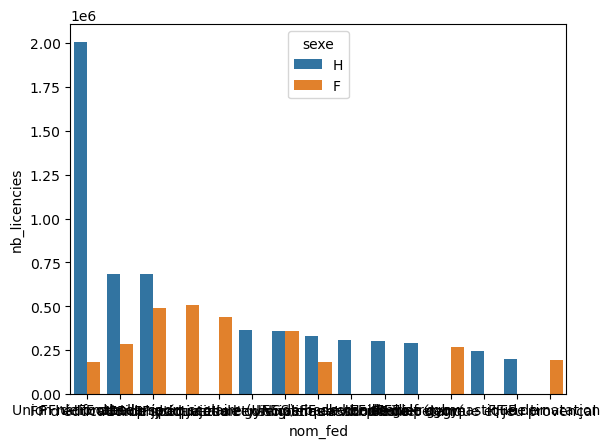

In [16]:
sns.barplot(x = 'nom_fed', y = 'nb_licencies', hue = 'sexe', data = top)

Structure de la pratique sportive dans chaque région